In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import cdist

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

#import hypertools as hyp
from collections import Counter

'''Set plotting parameters'''
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
df_van = pd.read_csv('marketing_campaign.csv', '\t')
df_van.shape

C:\Users\amare\AppData\Local\Temp\ipykernel_3976\780349743.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_van = pd.read_csv('marketing_campaign.csv', '\t')


(2240, 29)

# DATA CLEANING

In [3]:
df_van.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
import time
from datetime import datetime

In [5]:
current_date = pd.to_datetime('today')
df_van['Dt_Customer'] = pd.to_datetime(df_van['Dt_Customer'], format='%d-%m-%Y')
df_van['Dt_Customer'] = current_date - df_van['Dt_Customer']
df_van['Dt_Customer'] = df_van['Dt_Customer'].dt.days
df_van['Year_Birth'] = 2023 - df_van['Year_Birth']

In [6]:
df_van.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df_van.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,54.194196,52247.251354,0.444196,0.506250,3790.582143,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,202.122512,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,27.000000,1730.000000,0.000000,0.000000,3437.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,46.000000,35303.000000,0.000000,0.000000,3617.750000,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,53.000000,51381.500000,0.000000,0.000000,3792.500000,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,64.000000,68522.000000,1.000000,1.000000,3966.000000,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,130.000000,666666.000000,2.000000,2.000000,4136.000000,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df_van['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
df_van = df_van[df_van['Marital_Status'] != 'Alone']
df_van = df_van[df_van['Marital_Status'] != 'Absurd']
df_van = df_van[df_van['Marital_Status'] != 'YOLO']
df_van = df_van[df_van['Income'] < 600000]

In [10]:
df_van = df_van[df_van['Year_Birth'] <=100]

In [11]:
df_van.shape

(2205, 29)

In [12]:
df_van = df_van.dropna()
df_van.shape

(2205, 29)

In [13]:
df_van

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,66,Graduation,Single,58138.0,0,0,4100,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,69,Graduation,Single,46344.0,1,1,3550,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,58,Graduation,Together,71613.0,0,0,3749,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,39,Graduation,Together,26646.0,1,0,3576,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,42,PhD,Married,58293.0,1,0,3598,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,Graduation,Married,61223.0,0,1,3818,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,77,PhD,Together,64014.0,2,1,3456,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,42,Graduation,Divorced,56981.0,0,0,3592,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,67,Master,Together,69245.0,0,1,3593,8,428,...,3,0,0,0,0,0,0,3,11,0


In [14]:
df_van.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<Axes: >

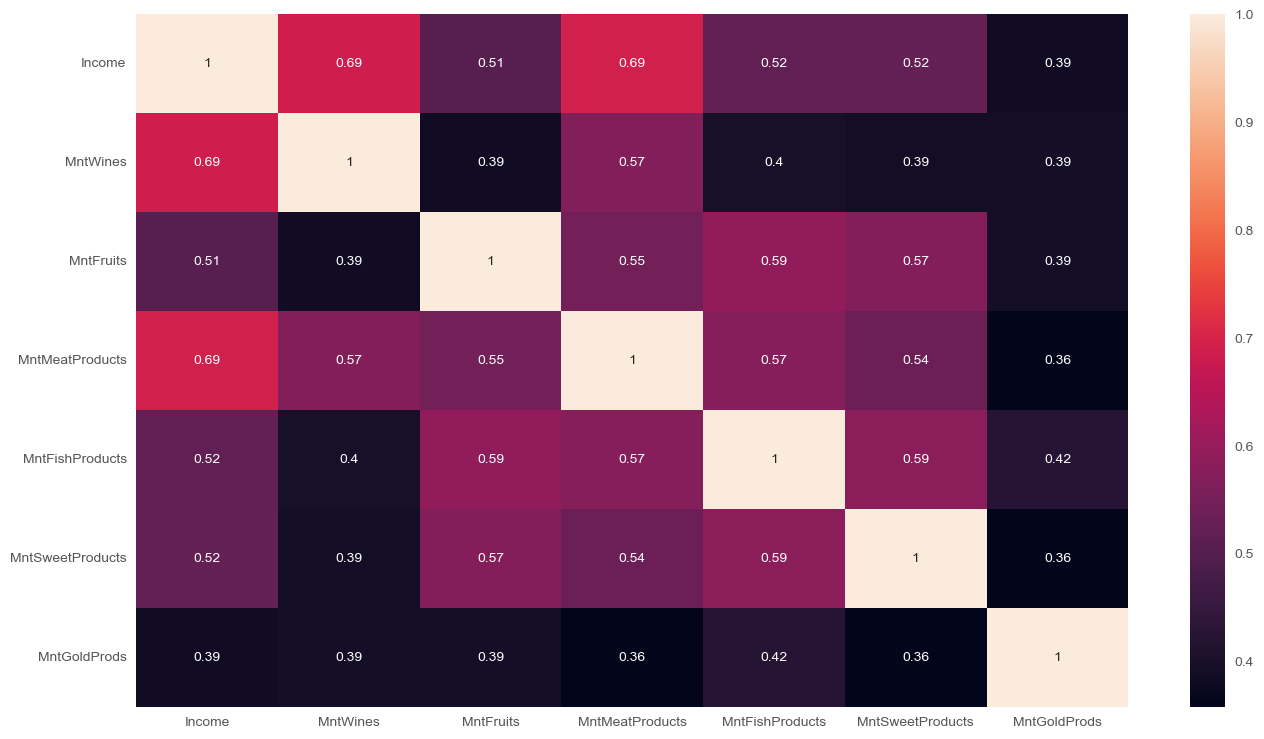

In [15]:
corr = df_van[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds'] ].corr()
sns.heatmap(corr, annot=True)

In [16]:
df_van = pd.get_dummies(df_van, drop_first = True)
#df_van = df_van.drop('ID', axis = 1)
df_van.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace = True)

In [17]:
df = df_van.copy()
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,66,58138.0,0,0,4100,58,635,88,546,...,0,1,0,1,0,0,0,1,0,0
1,2174,69,46344.0,1,1,3550,38,11,1,6,...,0,0,0,1,0,0,0,1,0,0
2,4141,58,71613.0,0,0,3749,26,426,49,127,...,0,0,0,1,0,0,0,0,1,0
3,6182,39,26646.0,1,0,3576,26,11,4,20,...,0,0,0,1,0,0,0,0,1,0
4,5324,42,58293.0,1,0,3598,94,173,43,118,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,61223.0,0,1,3818,46,709,43,182,...,0,0,0,1,0,0,1,0,0,0
2236,4001,77,64014.0,2,1,3456,56,406,0,30,...,0,0,0,0,0,1,0,0,1,0
2237,7270,42,56981.0,0,0,3592,91,908,48,217,...,0,0,0,1,0,0,0,0,0,0
2238,8235,67,69245.0,0,1,3593,8,428,30,214,...,0,0,0,0,1,0,0,0,1,0


In [18]:
column_names = list(df.iloc[0,:].reset_index()['index'])
column_names

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow']

# min max scaler

In [35]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df),columns=column_names)
df

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.696429,0.351086,0.0,0.0,0.948498,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.750000,0.277680,0.5,0.5,0.161660,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.553571,0.434956,0.0,0.0,0.446352,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.214286,0.155079,0.5,0.0,0.198856,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.267857,0.352051,0.5,0.0,0.230329,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.517857,0.370288,0.0,0.5,0.545064,0.464646,0.474883,0.216080,0.105507,0.162162,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2201,0.892857,0.387659,1.0,0.5,0.027182,0.565657,0.271936,0.000000,0.017391,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2202,0.267857,0.343885,0.0,0.0,0.221745,0.919192,0.608171,0.241206,0.125797,0.123552,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2203,0.714286,0.420217,0.0,0.5,0.223176,0.080808,0.286671,0.150754,0.124058,0.308880,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.0002452691923596189


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


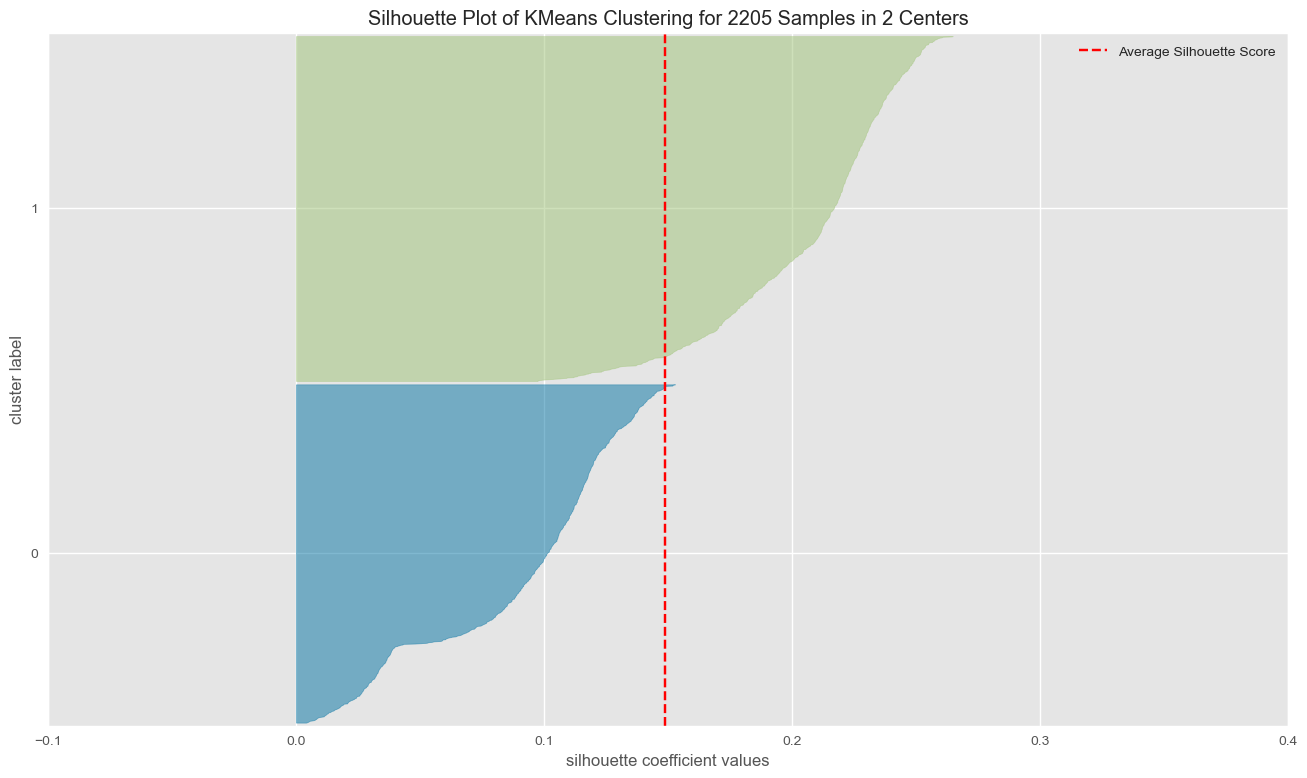

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : -0.014072110440096696


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


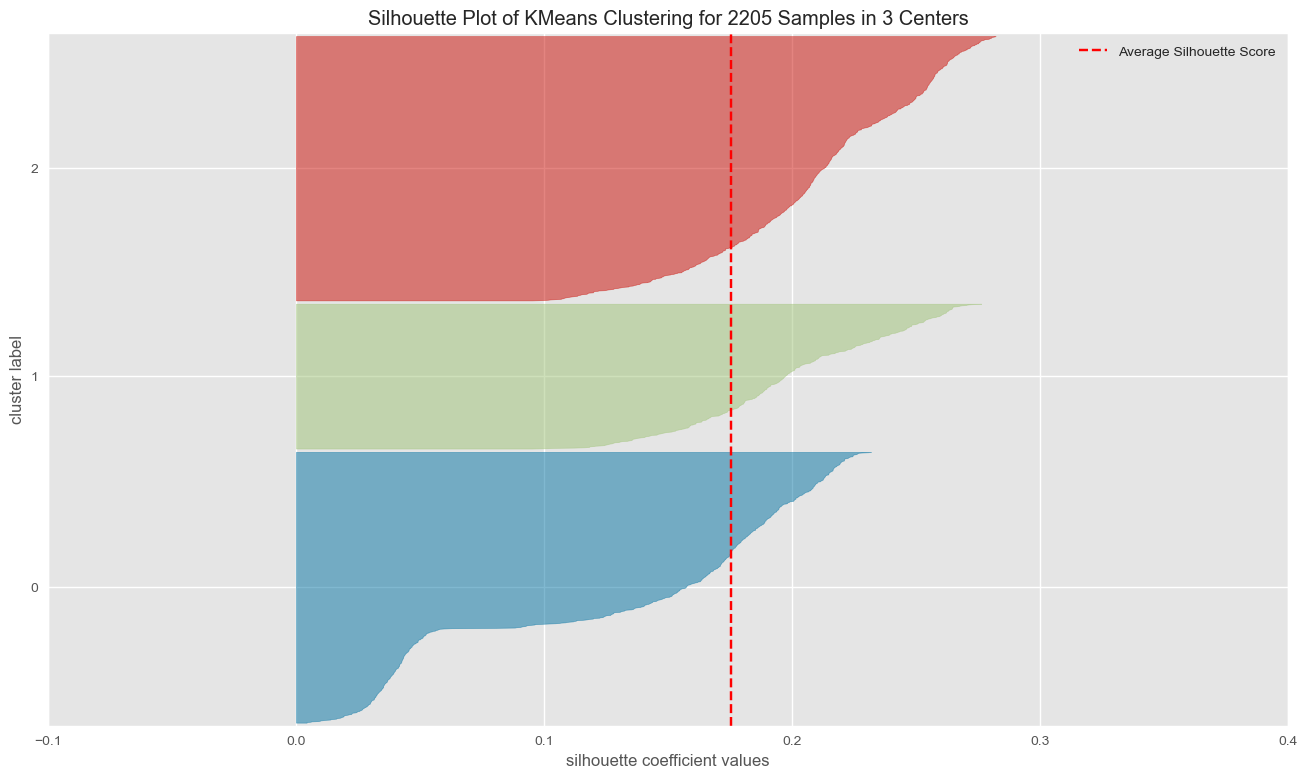

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : -0.020107894097024976


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


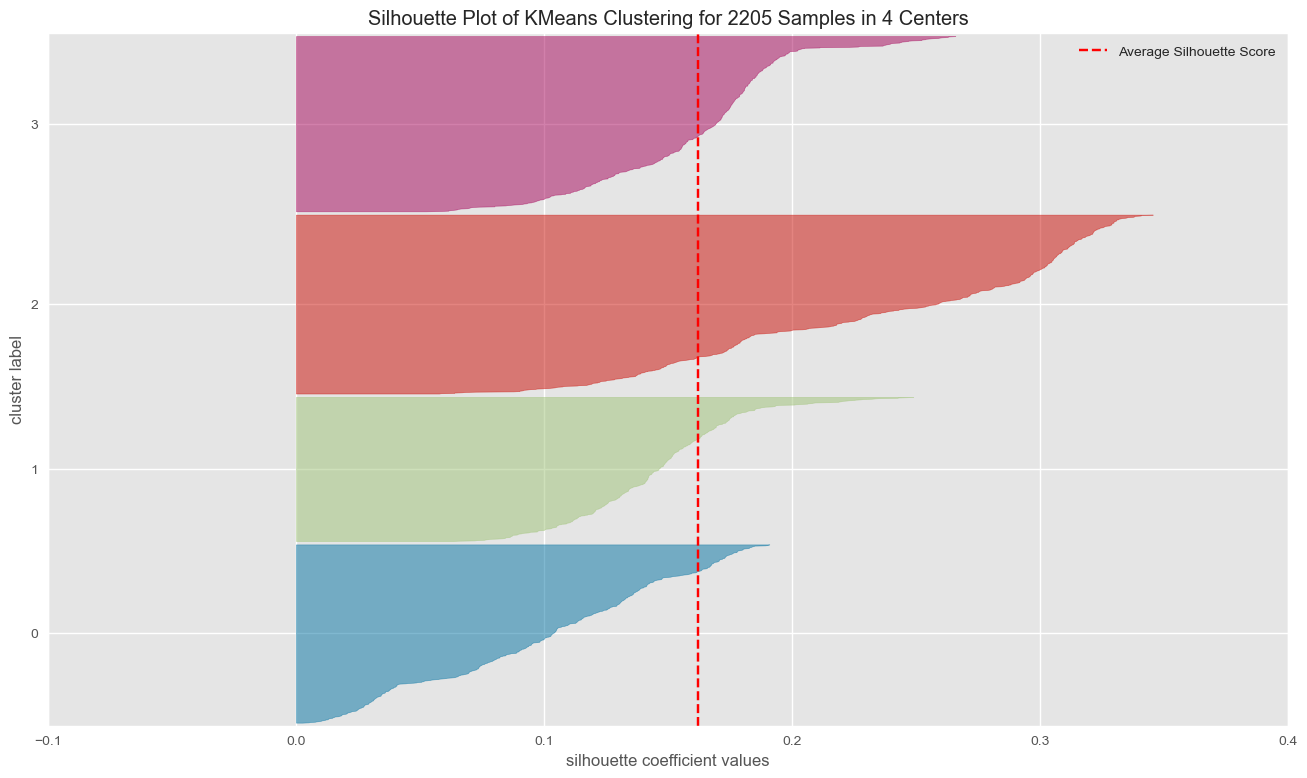

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : -0.07014426370707008


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


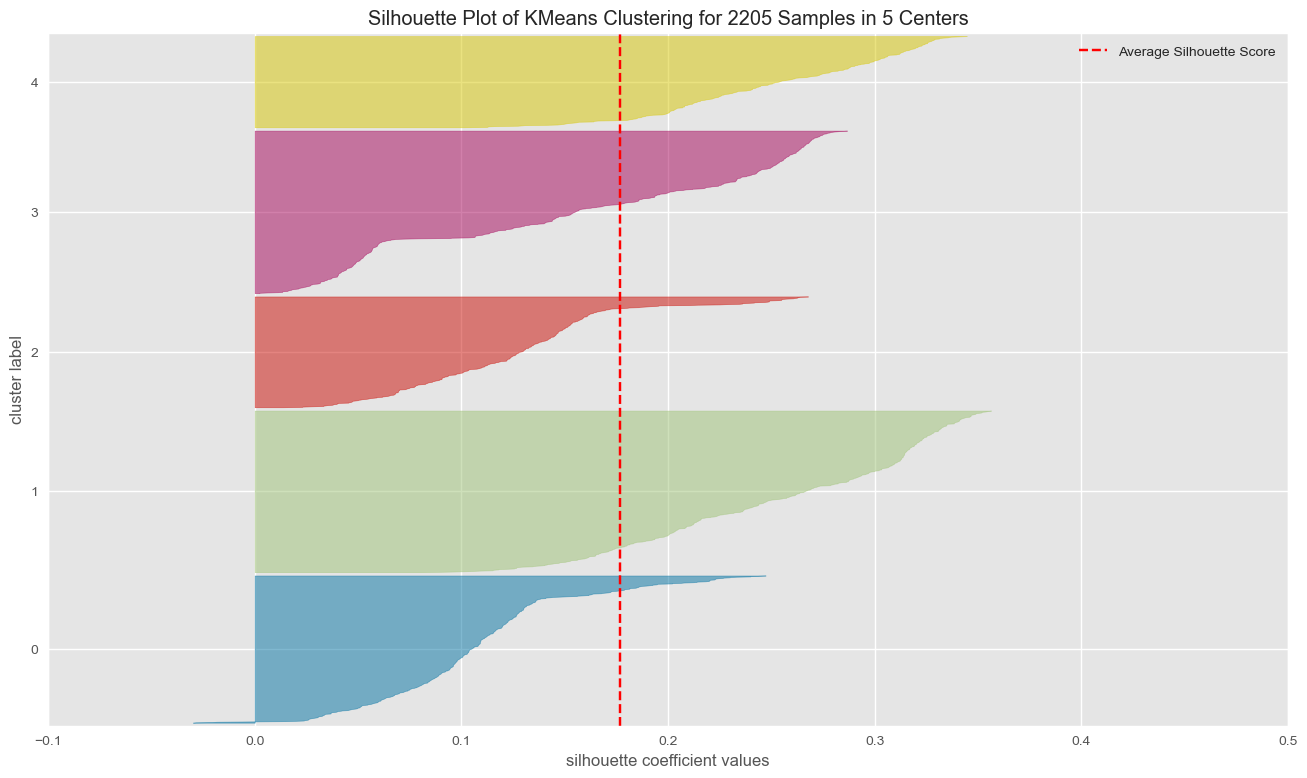

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : -0.1387811895569059


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


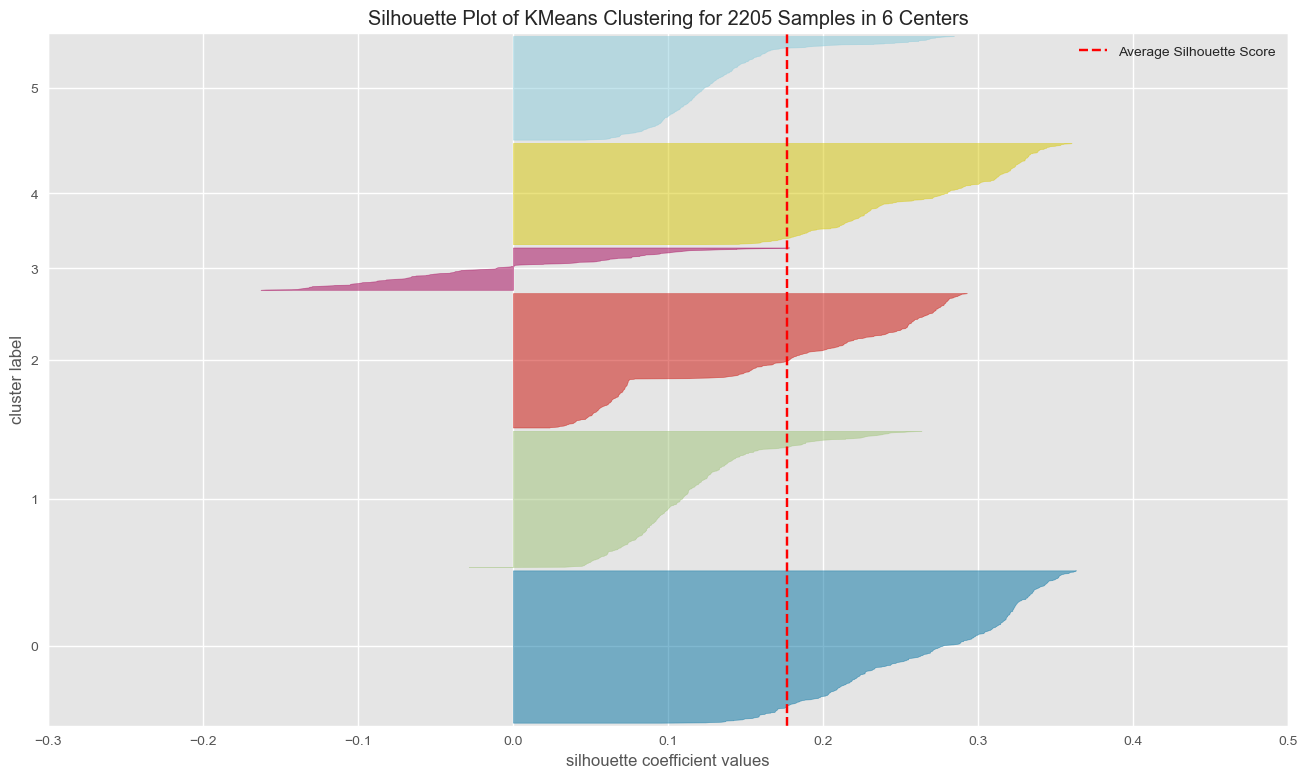

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : -0.15444602337255706


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


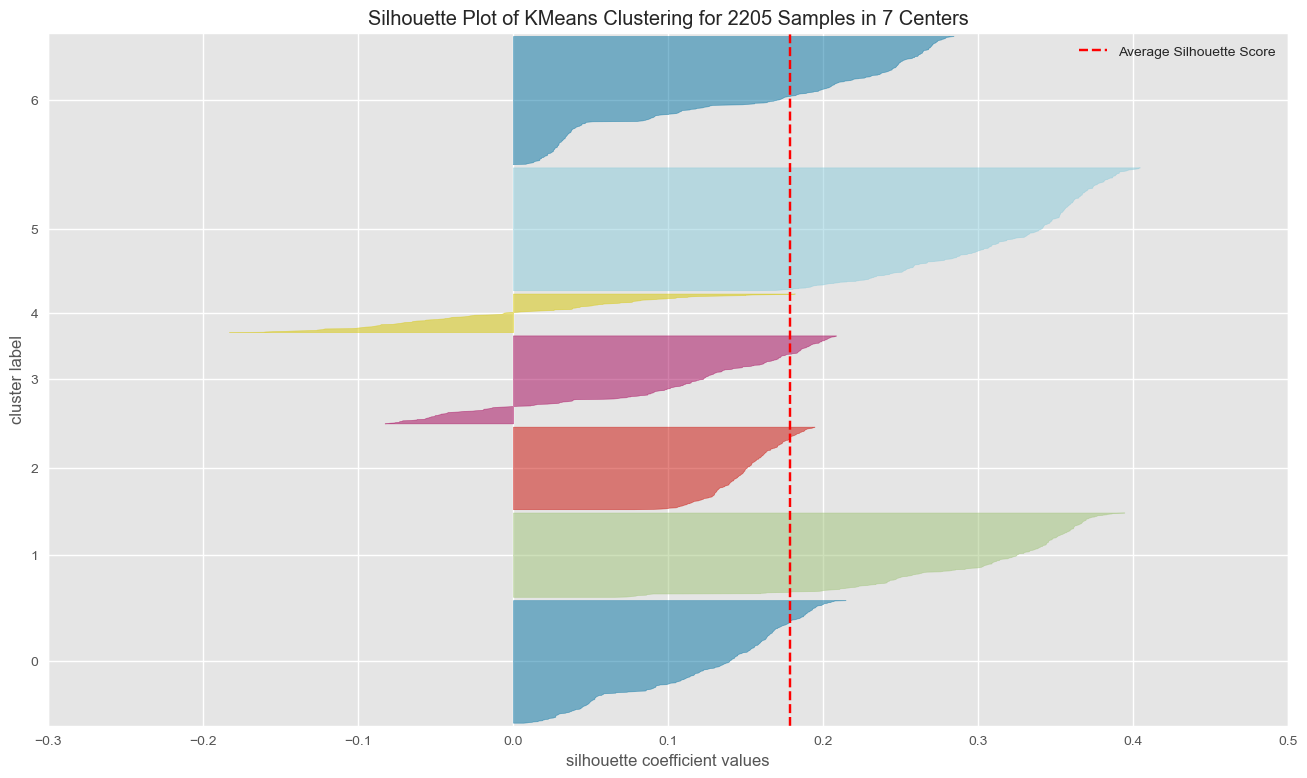

In [36]:
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()

for n_clusters in n_clusters:
    
    print('-'*70)
    
    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'auto'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(df)
    
    silhouette_avg = silhouette_score(df_van, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(df)        # Fit the data to the visualizer
    visualizer.poof()

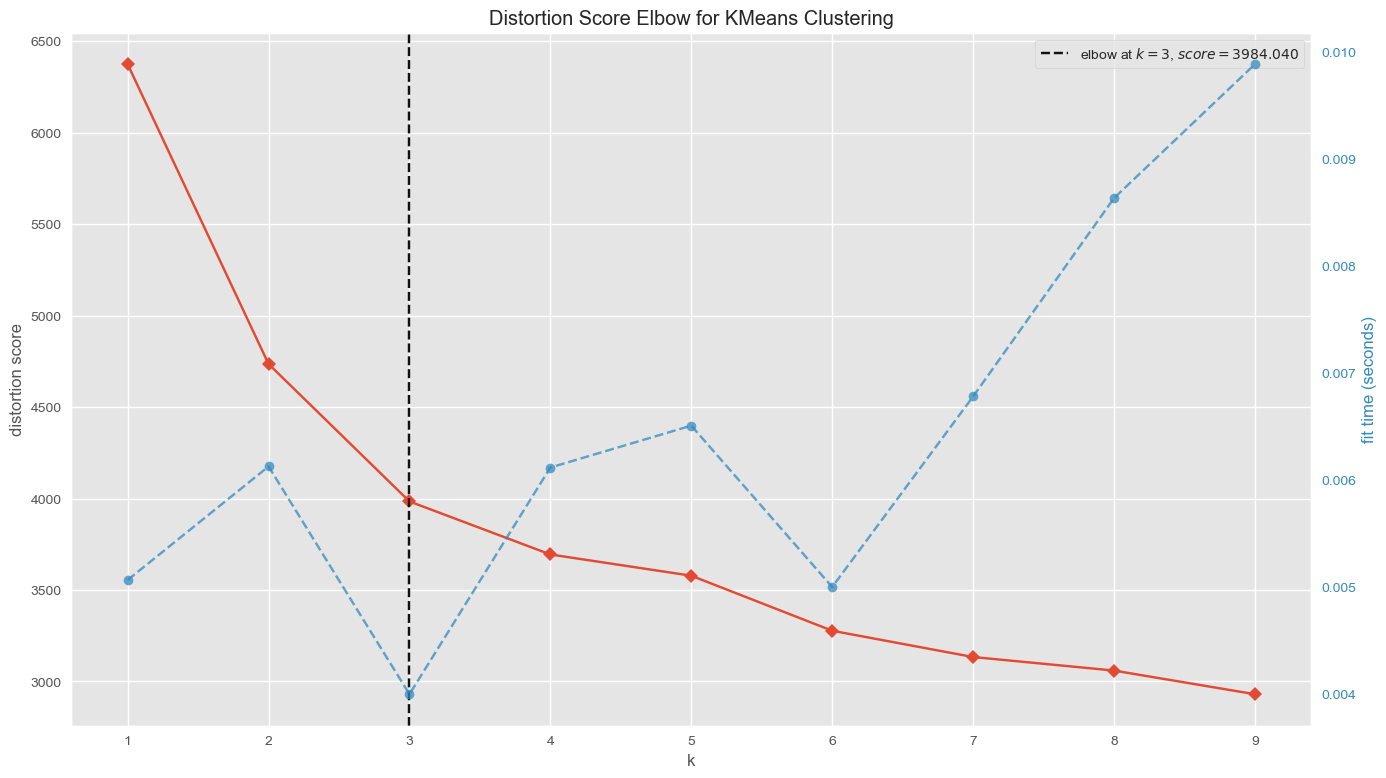

In [45]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10), locate_elbow=True)

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

In [38]:
'''use the best K combining everything'''
model = KMeans(
        n_clusters=3,
        init='k-means++',
        #n_jobs=-1,
        random_state=0)

model = model.fit(df)

y_kmeans = model.predict(df)
y_kmeans

C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, ..., 1, 1, 2])

In [39]:
df['Cluster'] = y_kmeans
df

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
0,0.696429,0.351086,0.0,0.0,0.948498,0.585859,0.425318,0.442211,0.316522,0.664093,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.750000,0.277680,0.5,0.5,0.161660,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.553571,0.434956,0.0,0.0,0.446352,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.214286,0.155079,0.5,0.0,0.198856,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.267857,0.352051,0.5,0.0,0.230329,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.517857,0.370288,0.0,0.5,0.545064,0.464646,0.474883,0.216080,0.105507,0.162162,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2201,0.892857,0.387659,1.0,0.5,0.027182,0.565657,0.271936,0.000000,0.017391,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2202,0.267857,0.343885,0.0,0.0,0.221745,0.919192,0.608171,0.241206,0.125797,0.123552,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2203,0.714286,0.420217,0.0,0.5,0.223176,0.080808,0.286671,0.150754,0.124058,0.308880,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [41]:
df.groupby('Cluster').mean()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.433245,0.306509,0.228723,0.200000,0.507034,0.497528,0.195535,0.137282,0.107381,0.149963,...,0.012766,0.225532,0.038298,0.523404,0.159574,0.204255,0.0,1.0,0.000000,0.00000
1,0.522759,0.317257,0.210706,0.278474,0.510914,0.502473,0.212992,0.132971,0.094892,0.150337,...,0.006834,0.143508,0.018223,0.498861,0.170843,0.217540,0.0,0.0,0.650342,0.08656
2,0.471995,0.311171,0.226954,0.255543,0.500383,0.487984,0.200841,0.128888,0.093273,0.136937,...,0.009335,0.114352,0.023337,0.500583,0.161027,0.221704,1.0,0.0,0.000000,0.00000


In [42]:
df_van2 = df_van.copy()

In [44]:
df_van2['Cluster'] = y_kmeans
df_van2.groupby('Cluster').mean()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
Cluster,,,,,,,,,,,,,,,,,,,,,
0,51.261702,50975.804255,0.457447,0.400000,3785.417021,49.255319,291.934043,27.319149,185.231915,38.840426,...,0.012766,0.225532,0.038298,0.523404,0.159574,0.204255,0.0,1.0,0.000000,0.00000
1,56.274487,52702.724374,0.421412,0.556948,3788.128702,49.744875,317.997722,26.461276,163.689066,38.937358,...,0.006834,0.143508,0.018223,0.498861,0.170843,0.217540,0.0,0.0,0.650342,0.08656
2,53.431739,51724.978996,0.453909,0.511085,3780.767795,48.310385,299.855309,25.648775,160.896149,35.466744,...,0.009335,0.114352,0.023337,0.500583,0.161027,0.221704,1.0,0.0,0.000000,0.00000


In [ ]:
# with scaling we cant get any meaningfull insights, so try with non - scaling data

# no scaling df_van

----------------------------------------------------------------------


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.576826371160024


C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


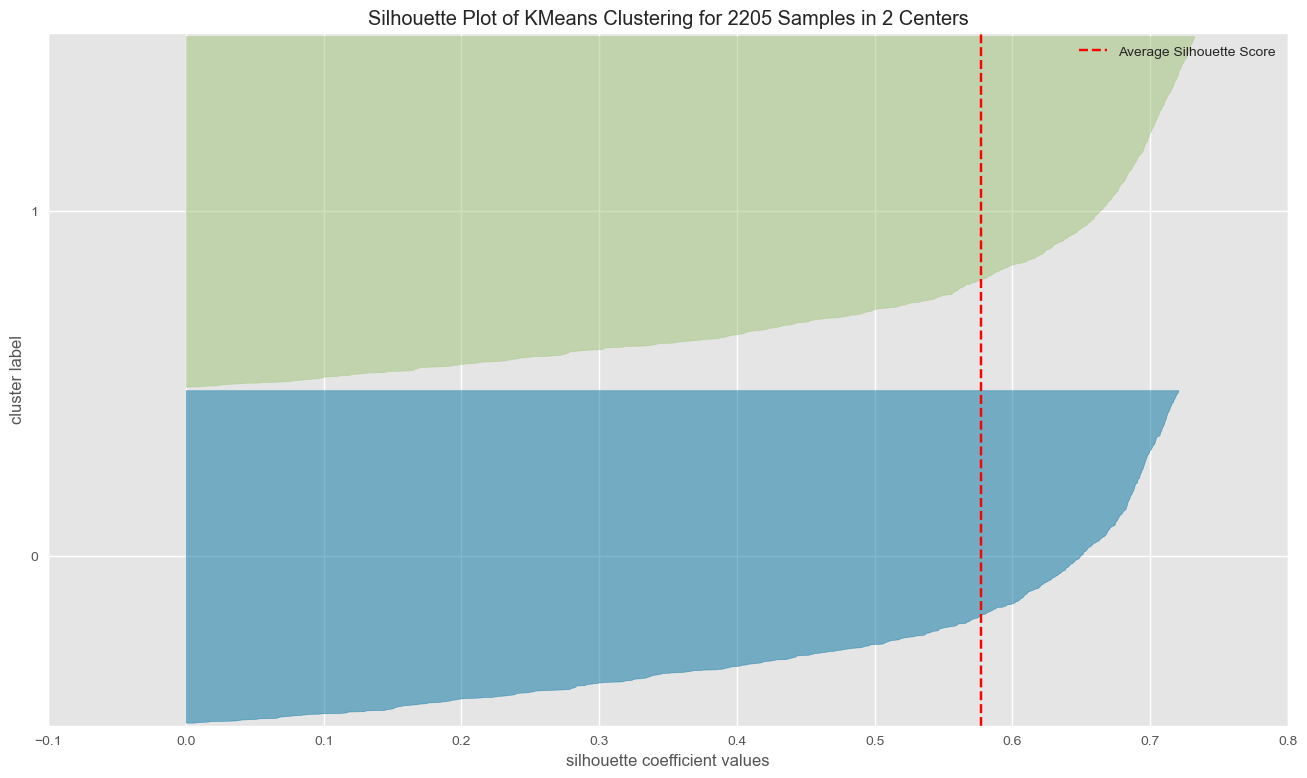

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.49061389785726806


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


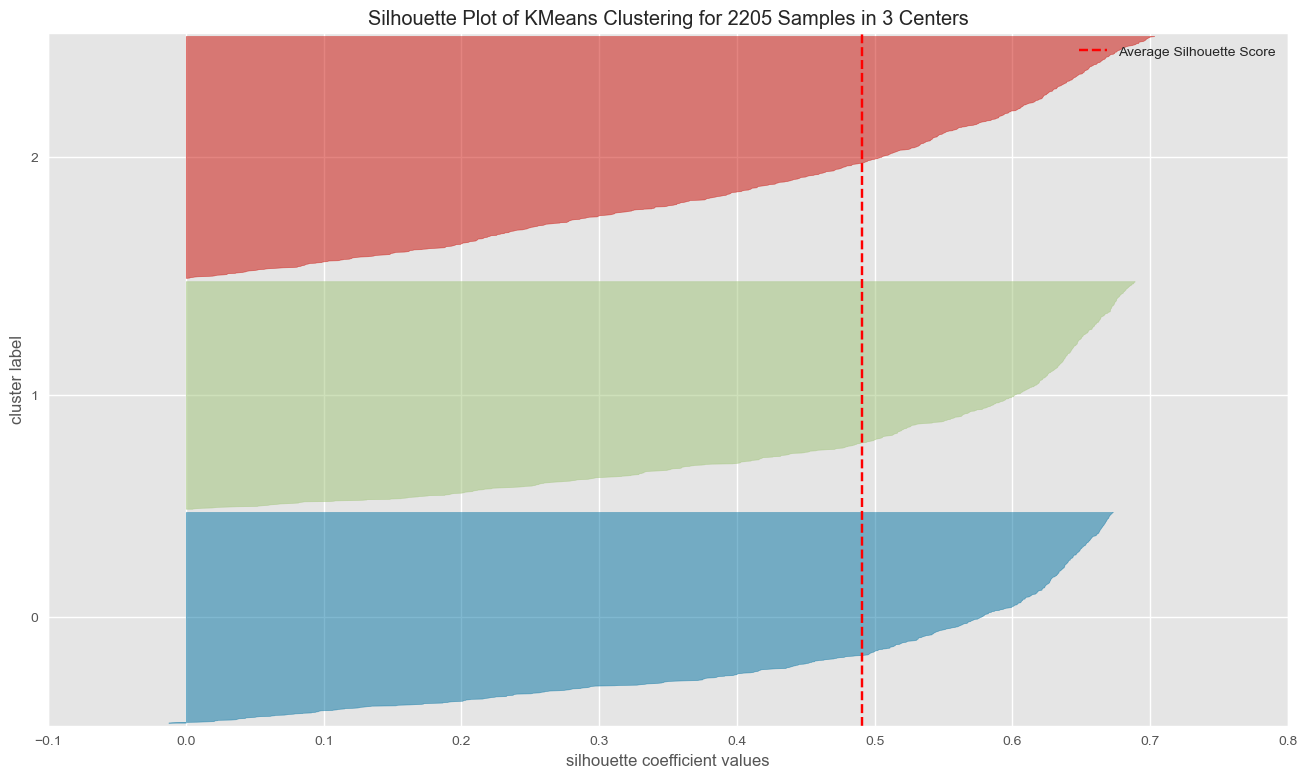

----------------------------------------------------------------------


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4583410561579433


C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


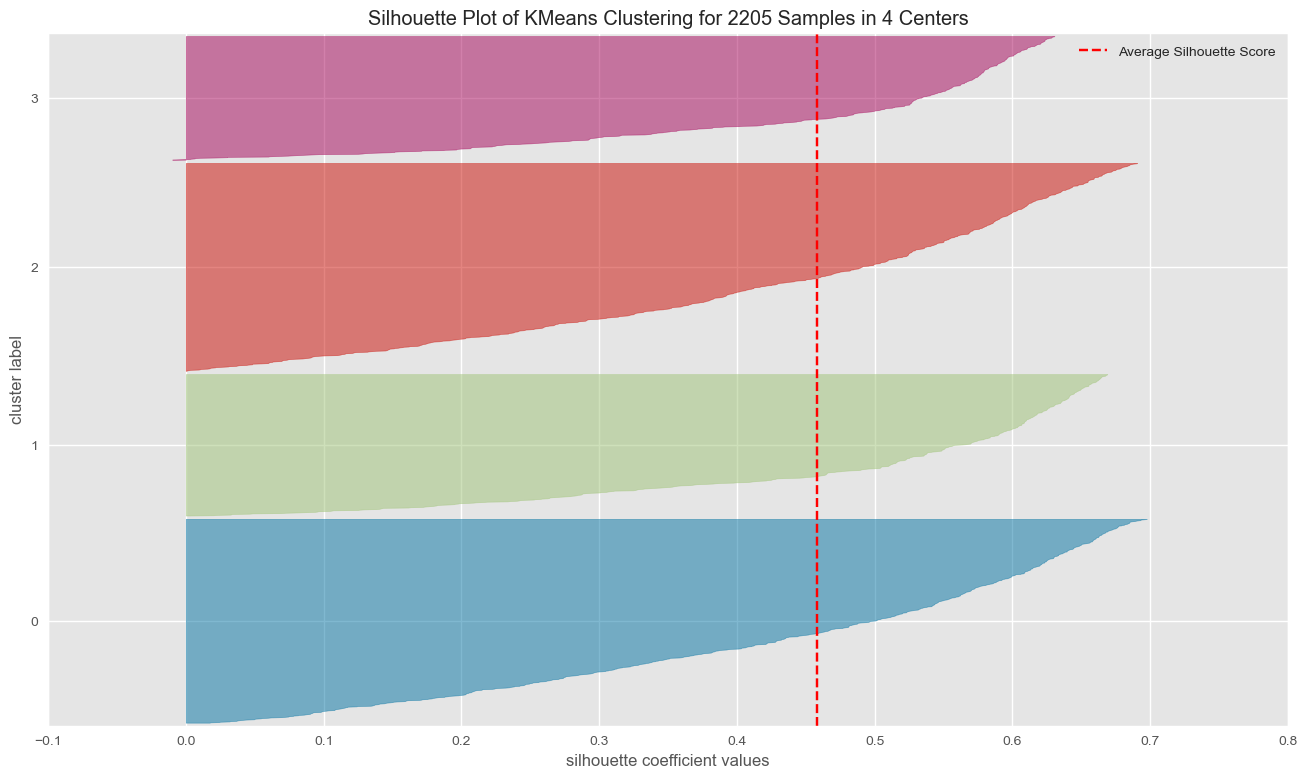

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.46294650620081135


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


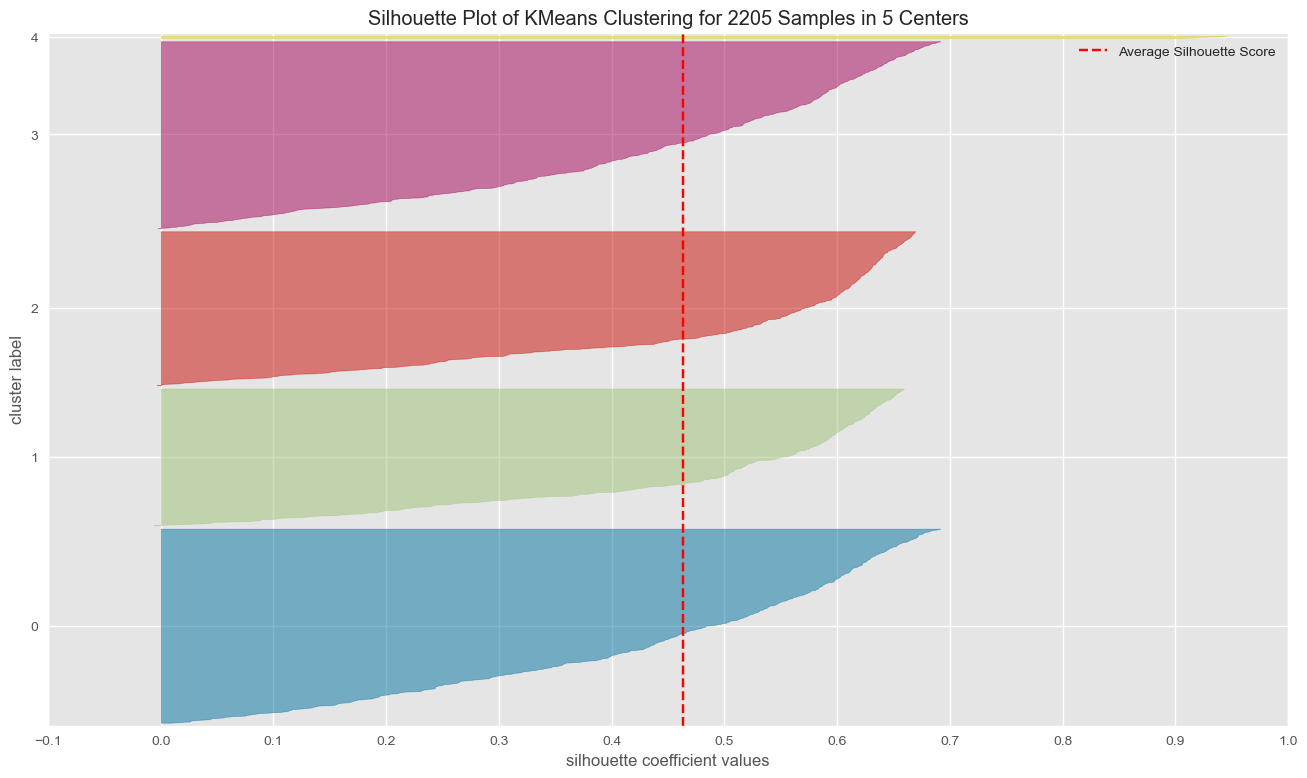

----------------------------------------------------------------------


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.43951718704635684


C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


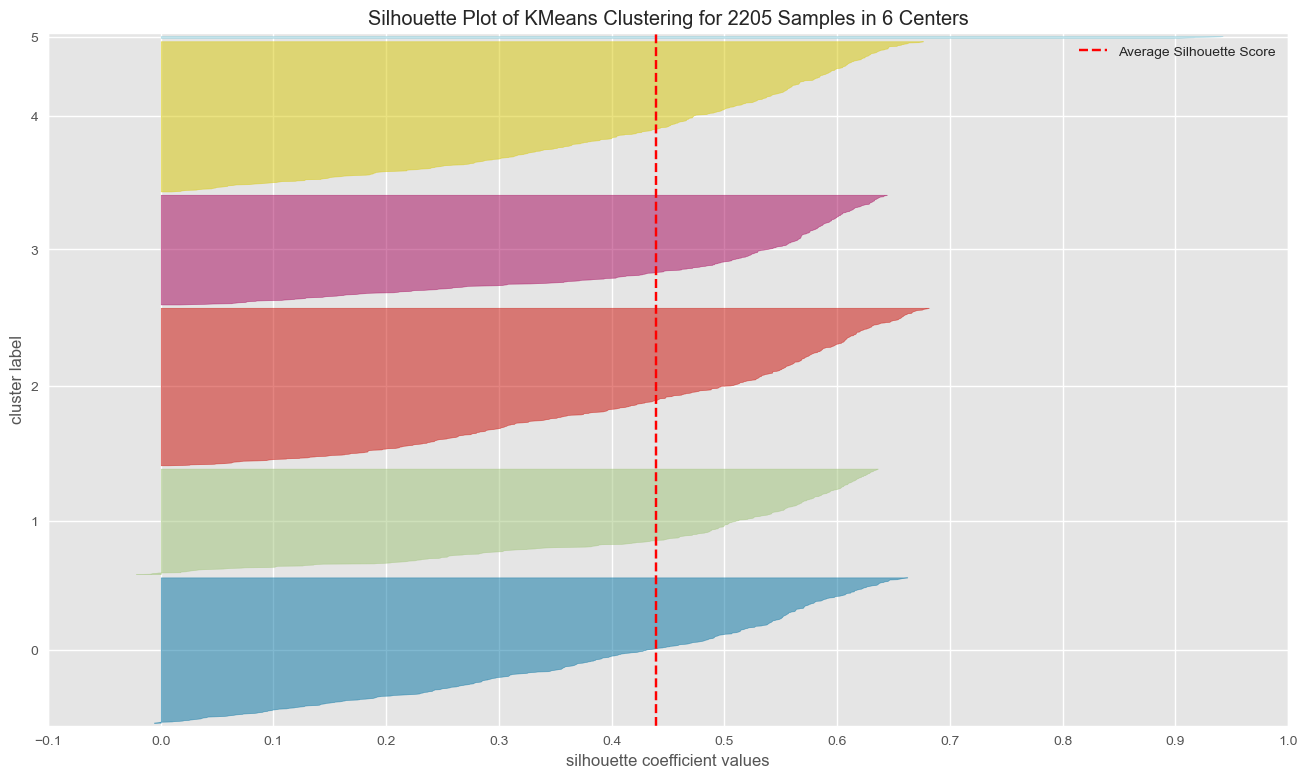

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.4031769364899446


C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\amare\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


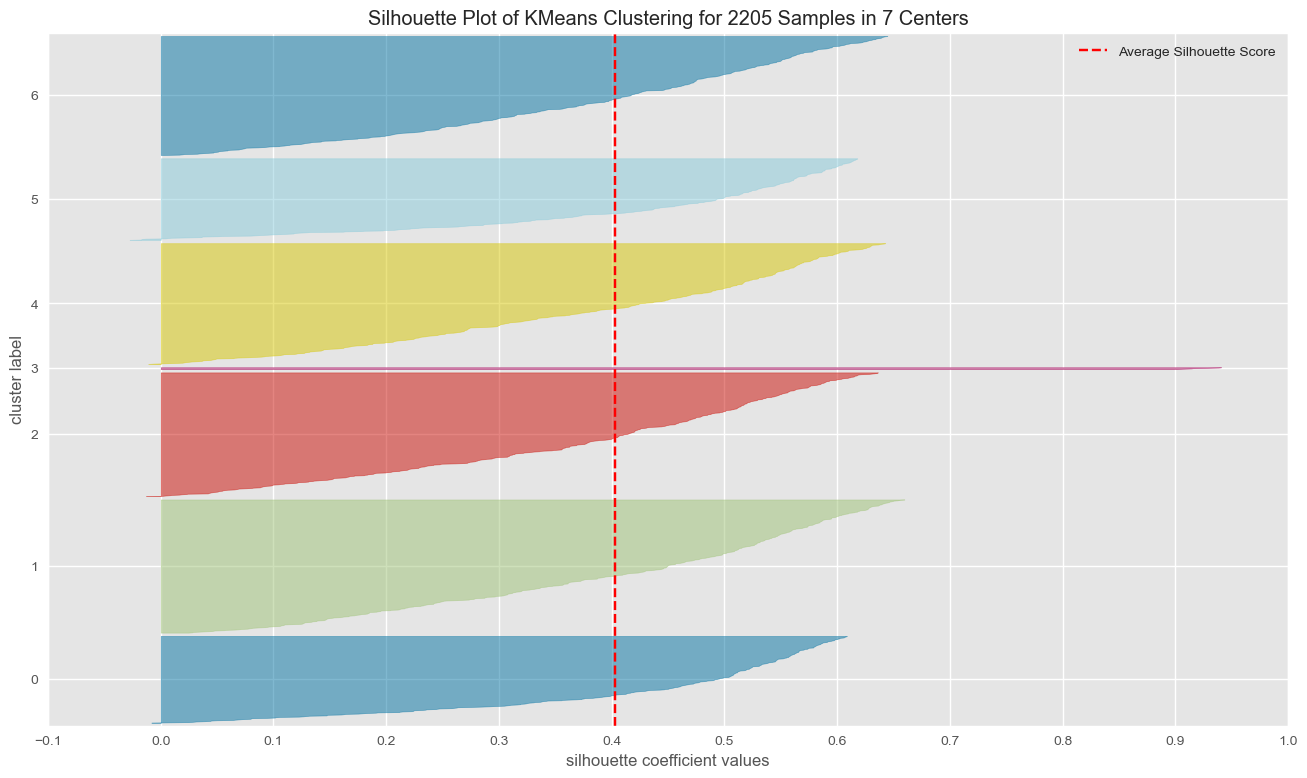

In [19]:
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()

for n_clusters in n_clusters:
    
    print('-'*70)
    
    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'auto'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(df_van)
    
    silhouette_avg = silhouette_score(df_van, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(df_van)        # Fit the data to the visualizer
    visualizer.poof()

In [20]:
'''use the best K combining everything'''
model = KMeans(
        n_clusters=3,
        init='k-means++',
        #n_jobs=-1,
        random_state=0)

model = model.fit(df_van)

y_kmeans = model.predict(df_van)
y_kmeans

C:\Users\amare\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, ..., 0, 1, 0])

In [21]:
df1 = df_van.copy()

In [22]:
df1['Cluster'] = y_kmeans
df1

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Cluster
0,5524,66,58138.0,0,0,4100,58,635,88,546,...,1,0,1,0,0,0,1,0,0,0
1,2174,69,46344.0,1,1,3550,38,11,1,6,...,0,0,1,0,0,0,1,0,0,0
2,4141,58,71613.0,0,0,3749,26,426,49,127,...,0,0,1,0,0,0,0,1,0,1
3,6182,39,26646.0,1,0,3576,26,11,4,20,...,0,0,1,0,0,0,0,1,0,2
4,5324,42,58293.0,1,0,3598,94,173,43,118,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,61223.0,0,1,3818,46,709,43,182,...,0,0,1,0,0,1,0,0,0,0
2236,4001,77,64014.0,2,1,3456,56,406,0,30,...,0,0,0,0,1,0,0,1,0,0
2237,7270,42,56981.0,0,0,3592,91,908,48,217,...,0,0,1,0,0,0,0,0,0,0
2238,8235,67,69245.0,0,1,3593,8,428,30,214,...,0,0,0,1,0,0,0,1,0,1


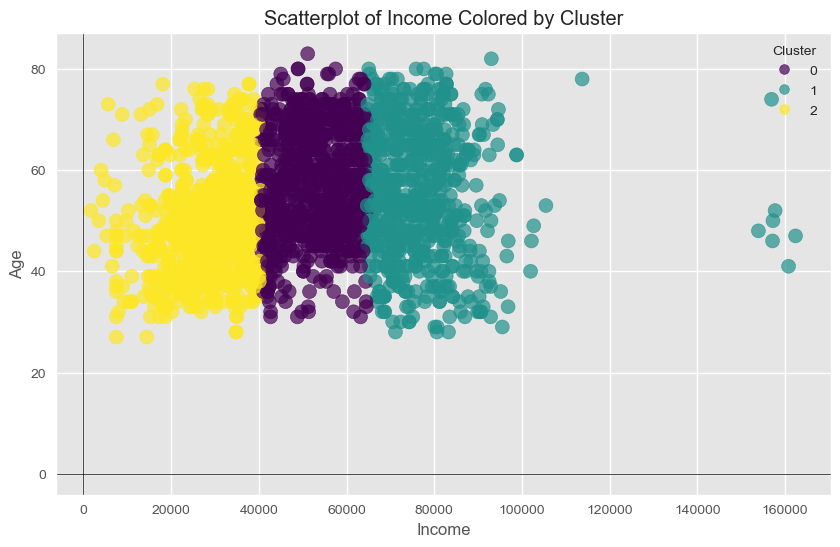

In [41]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df1['Income'], df1['Year_Birth'], c=df1['Cluster'], cmap='viridis', s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Scatterplot of Income Colored by Cluster')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Show the plot
plt.show()

In [26]:
viz = df1.groupby('Cluster').mean()
viz

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5358.390306,56.922194,52393.752551,0.408163,0.821429,3800.246173,49.625000,292.567602,18.984694,99.533163,...,0.005102,0.109694,0.000000,0.479592,0.191327,0.248724,0.377551,0.198980,0.258929,0.043367
1,5770.657394,55.493411,76989.639824,0.084919,0.352855,3778.837482,49.027818,616.980966,56.726208,397.838946,...,0.007321,0.234261,0.000000,0.531479,0.153734,0.238653,0.390922,0.204978,0.260615,0.042460
2,5664.127371,49.815718,28318.836043,0.807588,0.311653,3791.506775,48.558266,30.644986,5.997290,25.620596,...,0.014905,0.113821,0.073171,0.506775,0.146341,0.161247,0.398374,0.235772,0.257453,0.017615


In [27]:
'''make an instance of the Model, either set n.comps or target variance'''
#pca = PCA(n_components=3)
pca_80 = PCA(0.80)

'''fit PCA on dataset.'''
principalComponents_80 = pca_80.fit_transform(df_van)

'''print number of components'''
print("n.comps:", pca_80.n_components_)

principal80_df = pd.DataFrame(data = principalComponents_80)
principal80_df

n.comps: 1


,0
0,6189.398408
1,-5614.825086
2,19657.696428
3,-25310.683831
4,6336.076159
...,...
2200,9272.774673
2201,12058.252647
2202,5032.974219
2203,17290.895092


In [30]:
temp = df1.drop('Cluster', axis = 1)
'''make an instance of the Model, either set n.comps or target variance'''
#pca = PCA(n_components=3)
pca_80 = PCA(n_components=3)

'''fit PCA on dataset.'''
principalComponents_80 = pca_80.fit_transform(temp)

'''print number of components'''
print("n.comps:", pca_80.n_components_)

principal80_df = pd.DataFrame(data = principalComponents_80)


n.comps: 3


In [31]:
principal80_df


,0,1,2
0,6189.398408,-65.668139,-440.631037
1,-5614.825086,-3413.380844,344.781910
2,19657.696428,-1448.798891,135.476810
3,-25310.683831,595.745325,108.784701
4,6336.076159,-264.489984,280.663673
...,...,...,...
2200,9272.774673,5280.165916,-287.325308
2201,12058.252647,-1588.216164,225.473230
2202,5032.974219,1680.060018,-395.115500
2203,17290.895092,2645.332328,152.076648


In [32]:
pca_80.explained_variance_ratio_

array([9.77556034e-01, 2.21598634e-02, 1.43454219e-04])

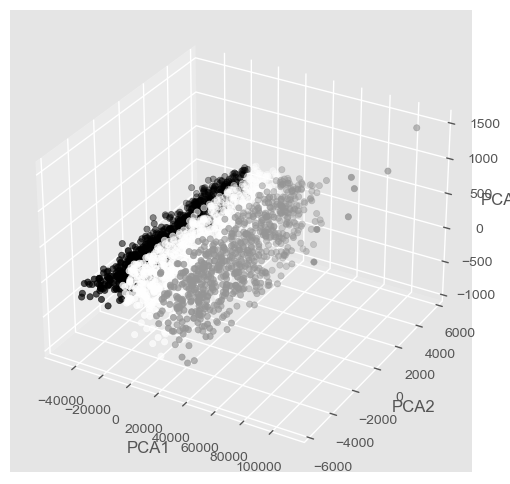

In [34]:

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(principal80_df[0], principal80_df[1], principal80_df[2], c=df1['Cluster'])


ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.show()

In [85]:
viz

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
Cluster,,,,,,,,,,,,,,,,,,,,,
0,56.933504,52393.455243,0.405371,0.822251,3794.606138,49.602302,293.084399,19.023018,99.383632,25.214834,...,11.0,0.109974,0.000000,0.476982,0.191816,0.250639,0.375959,0.199488,0.259591,0.043478
1,55.488304,76971.704678,0.086257,0.352339,3772.387427,49.024854,616.521930,56.643275,397.666667,82.480994,...,11.0,0.233918,0.000000,0.532164,0.153509,0.238304,0.391813,0.204678,0.260234,0.042398
2,49.820027,28335.046008,0.809202,0.312585,3785.583221,48.587280,30.438430,6.000000,25.634641,9.069012,...,11.0,0.113667,0.073072,0.508796,0.146143,0.159675,0.399188,0.235453,0.257104,0.017591


In [113]:
viz.columns


Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

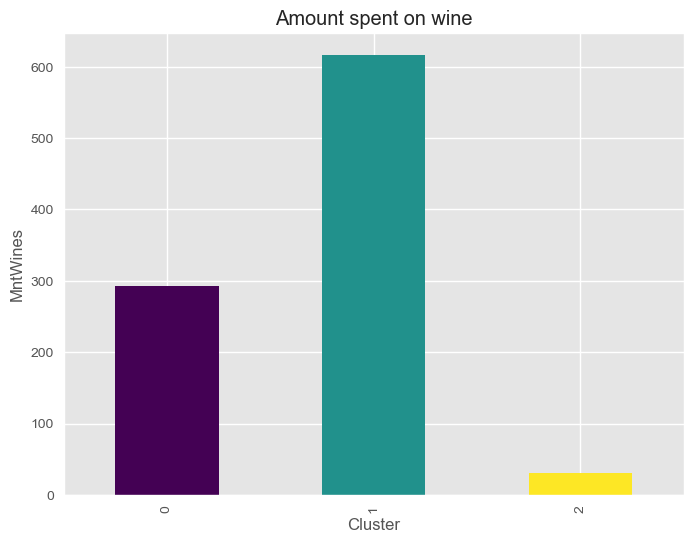

In [114]:
column = 'MntWines'

colors = plt.cm.viridis(np.linspace(0, 1, len(viz)))

viz['MntWines'].plot.bar(figsize=(8, 6), color = colors)
plt.xlabel('Cluster')
plt.ylabel(column)
plt.title(f'Amount spent on wine')
plt.show()

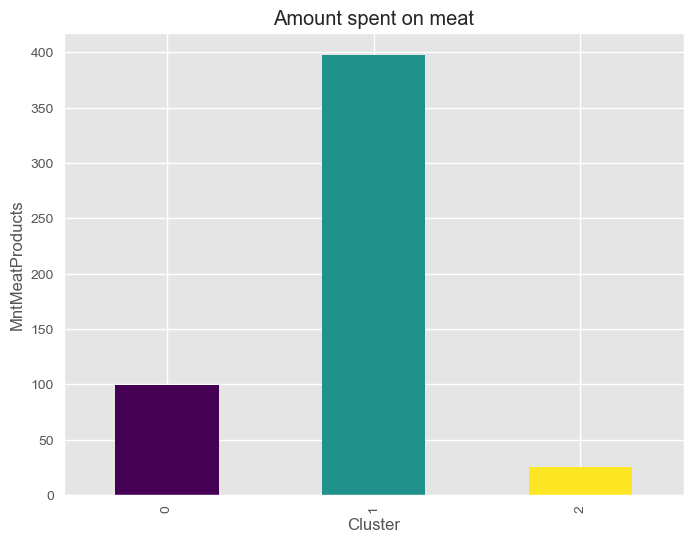

In [115]:
column = 'MntMeatProducts'

colors = plt.cm.viridis(np.linspace(0, 1, len(viz)))

viz['MntMeatProducts'].plot.bar(figsize=(8, 6), color = colors)
plt.xlabel('Cluster')
plt.ylabel(column)
plt.title(f'Amount spent on meat')
plt.show()

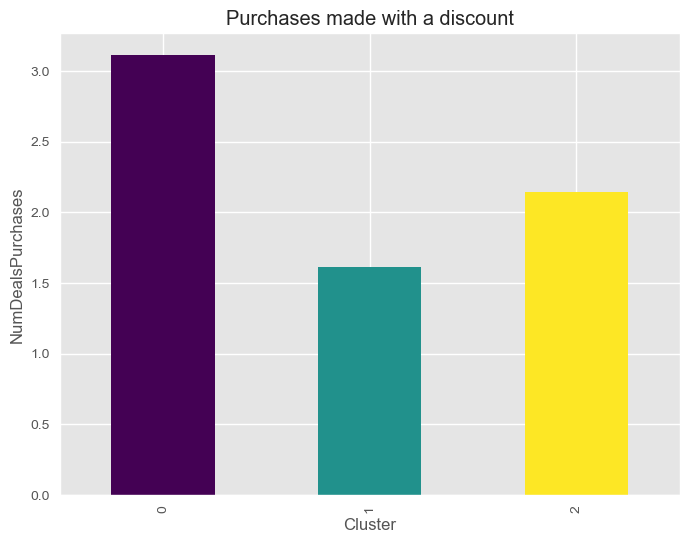

In [117]:
column = 'NumDealsPurchases'

colors = plt.cm.viridis(np.linspace(0, 1, len(viz)))

viz['NumDealsPurchases'].plot.bar(figsize=(8, 6), color = colors)
plt.xlabel('Cluster')
plt.ylabel(column)
plt.title(f'Purchases made with a discount')
plt.show()

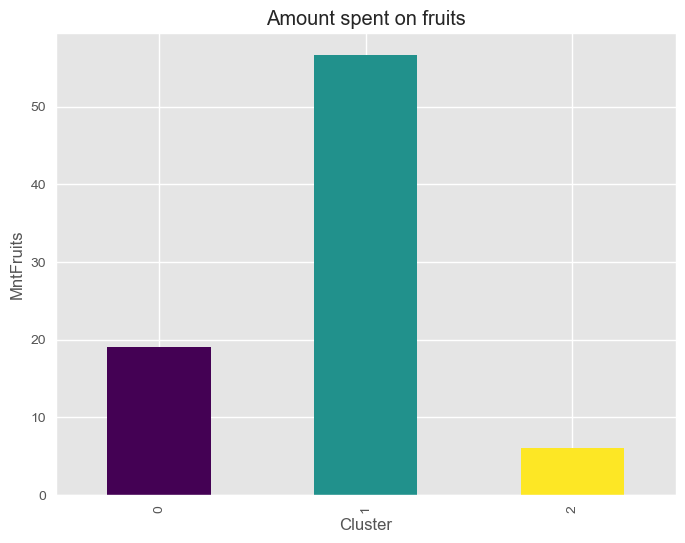

In [119]:
column = 'MntFruits'

colors = plt.cm.viridis(np.linspace(0, 1, len(viz)))

viz['MntFruits'].plot.bar(figsize=(8, 6), color = colors)
plt.xlabel('Cluster')
plt.ylabel(column)
plt.title(f'Amount spent on fruits')
plt.show()

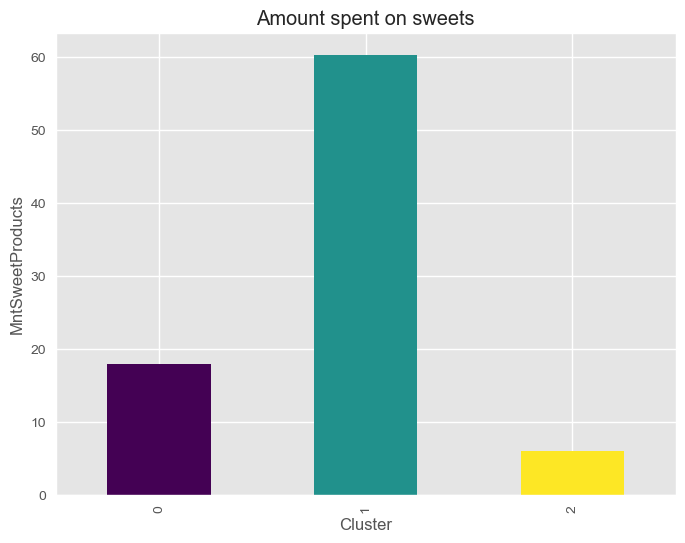

In [120]:
column = 'MntSweetProducts'

colors = plt.cm.viridis(np.linspace(0, 1, len(viz)))

viz['MntSweetProducts'].plot.bar(figsize=(8, 6), color = colors)
plt.xlabel('Cluster')
plt.ylabel(column)
plt.title(f'Amount spent on sweets')
plt.show()

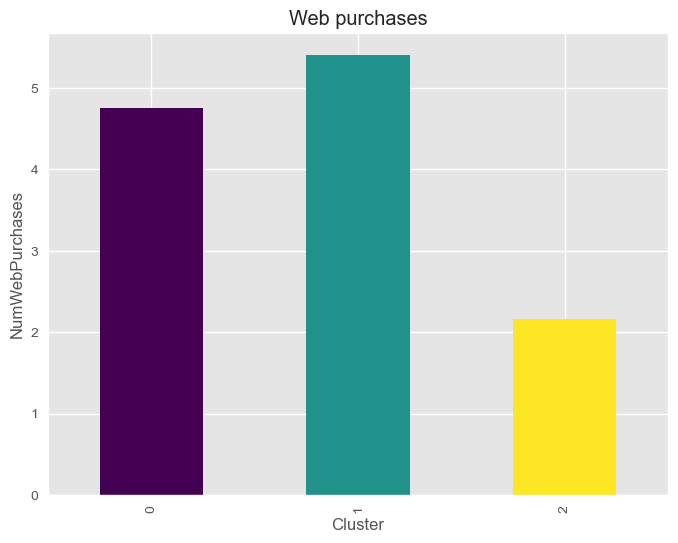

In [122]:
column = 'NumWebPurchases'

colors = plt.cm.viridis(np.linspace(0, 1, len(viz)))

viz['NumWebPurchases'].plot.bar(figsize=(8, 6), color = colors)
plt.xlabel('Cluster')
plt.ylabel(column)
plt.title(f'Web purchases')
plt.show()